# Case Study: Analyzing U.S. Storm Events for Disaster Preparedness 

In this case study, we will analyze storm event data to enhance disaster preparedness efforts in the U.S. We will follow a structured data analysis workflow comprising the following phases:

1. **Ask**: Define the problem and confirm expectations.
2. **Prepare**: Collect and store data for analysis.
3. **Process**: Clean and transform data to ensure integrity.
4. **Analyze**: Use data analysis tools to draw conclusions.
5. **Share**: Interpret and communicate results to make data-driven decisions.
6. **Act**: Put insights to work to address the original problem.

We will utilize the open-source Storm Event Database provided by the National Oceanic and Atmospheric Administration (NOAA), available at [NOAA Storm Events Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp). This dataset contains comprehensive information about various storm events across the U.S., including details such as event type, location, and impact.

## Ask

### Problem Statement
The U.S. experiences various storm events that can impact public safety, property, and infrastructure. Analyzing the patterns and impacts of these storms will provide insights that can inform disaster preparedness and response strategies.

### Key Questions
1. **What types of storm events are most prevalent in the U.S.?**  
   Identify the most common storm events and their geographical distribution.

2. **Where do storm events most frequently occur?**  
   Map the geographical distribution of storm events to identify high-risk areas.

3. **Are certain regions more prone to specific types of storm events?**  
   Analyze the geographic hot spots for storm types to develop tailored regional preparedness plans.

4. **What is the temporal distribution of storm events?**  
   Analyze trends over time to understand seasonal patterns and changes in frequency.

5. **What is the impact of different storm events on injuries, fatalities, and property damage?**  
   Assess the severity of various storm types and their associated risks to prioritize high-risk events for preparedness planning.

6. **How can this analysis inform disaster preparedness initiatives?**  
   Determine actionable insights that can help stakeholders enhance response plans and allocate resources effectively.

## Prepare

### Data Sources
We will use the Storm Events Database from the NOAA for the years 2014 to 2024. The dataset can be accessed at [NOAA Storm Events Database](https://www.ncdc.noaa.gov/stormevents/ftp.jsp).

### Data Collection
The relevant files will be downloaded in CSV.GZ format, which is a compressed version of CSV files.

### Data Description
The dataset contains 51 columns with various types of information related to storm events. Below is the data dictionary presented in a table format:


| Column Name         | Example                                                    | Description                                                                                                             |
|:--------------------|:-----------------------------------------------------------|:------------------------------------------------------------------------------------------------------------------------|
| begin_yearmonth     | 201212                                                     | The year and month that the event began (YYYYMM format).                                                                |
| begin_day           | 31                                                         | The day of the month that the event began (DD format).                                                                  |
| begin_time          | 2359                                                       | The time of day that the event began (hhmm format).                                                                     |
| end_yearmonth       | 201301                                                     | The year and month that the event ended (YYYYMM format).                                                                |
| end_day             | 01                                                         | The day of the month that the event ended (DD format).                                                                  |
| end_time            | 0001                                                       | The time of day that the event ended (hhmm format).                                                                     |
| episode_id          | 61280                                                      | ID assigned by NWS to denote the storm episode; may contain multiple events.                                            |
| event_id            | 383097                                                     | ID assigned by NWS for each individual storm event (Primary database key field).                                        |
| state               | GEORGIA                                                    | The state name where the event occurred (ALL CAPS).                                                                     |
| state_fips          | 45                                                         | Unique number assigned to the county by NIST (State FIPS).                                                              |
| year                | 2000                                                       | The four-digit year for the event in this record.                                                                       |
| month_name          | January                                                    | The name of the month for the event (not abbreviated).                                                                  |
| event_type          | Hail                                                       | The type of storm event (spelled out; not abbreviated).                                                                 |
| cz_type             | C                                                          | Indicates whether the event happened in a County/Parish, NWS Public Forecast Zone, or Marine.                           |
| cz_fips             | 245                                                        | The county FIPS number assigned by NIST or NWS Forecast Zone Number.                                                    |
| cz_name             | AIKEN                                                      | Name assigned to the county FIPS number or NWS Forecast Zone.                                                           |
| wfo                 | CAE                                                        | The NWS Forecast Office’s area of responsibility in which the event occurred.                                           |
| begin_date_time     | 04/1/2012 20:48:00                                         | Start date and time of the event (MM/DD/YYYY hh:mm:ss).                                                                 |
| cz_timezone         | EST-5                                                      | Time Zone for the County/Parish, Zone or Marine Name.                                                                   |
| end_date_time       | 04/1/2012 21:03:00                                         | End date and time of the event (MM/DD/YYYY hh:mm:ss).                                                                   |
| injuries_direct     | 1                                                          | Number of injuries directly caused by the weather event.                                                                |
| injuries_indirect   | 0                                                          | Number of injuries indirectly caused by the weather event.                                                              |
| deaths_direct       | 0                                                          | Number of deaths directly caused by the weather event.                                                                  |
| deaths_indirect     | 0                                                          | Number of deaths indirectly caused by the weather event.                                                                |
| damage_property     | 10.00K                                                     | Estimated property damage incurred by the weather event.                                                                |
| damage_crops        | 0.00K                                                      | Estimated damage to crops incurred by the weather event.                                                                |
| source              | Public                                                     | Source reporting the weather event.                                                                                     |
| magnitude           | 0.75                                                       | Measured extent of the magnitude type (only for wind speeds and hail size).                                             |
| magnitude_type      | EG                                                         | Type of magnitude measurement (e.g., wind estimated gust).                                                              |
| flood_cause         | Ice Jam                                                    | Reported cause of the flood.                                                                                            |
| category            |                                                     | Unknown (During the time of downloading this particular file, NCDC has never seen anything provided within this field.) |
| tor_f_scale         | EF0                                                        | Enhanced Fujita Scale describing tornado strength.                                                                      |
| tor_length          | 0.66                                                       | Length of the tornado while on the ground (in miles).                                                                   |
| tor_width           | 25                                                         | Width of the tornado while on the ground (in whole yards).                                                              |
| tor_other_wfo       | DDC                                                        | Continuation of a tornado segment as it crossed from one NWS Forecast Office to another.                                |
| tor_other_cz_state  | KS                                                         | Two-character representation for the state name of the continuing tornado segment.                                      |
| tor_other_cz_fips   | 41                                                         | FIPS number of the county for the continuing tornado segment.                                                           |
| tor_other_cz_name   | DICKINSON                                                  | Name of the county for the continuing tornado segment.                                                                  |
| begin_range         | 0.59                                                       | Distance to the nearest tenth of a mile to the location referenced.                                                     |
| begin_azimuth       | ENE                                                        | 16-point compass direction from the location referenced.                                                                |
| begin_location      | PINELAND                                                   | Name of city, town, or village from which the range is calculated.                                                      |
| end_range           | 0.66                                                       | See begin_range.                                                                                                        |
| end_azimuth         | WNW                                                        | See begin_azimuth.                                                                                                      |
| end_location        | RUSK                                                       | See begin_location.                                                                                                     |
| begin_lat           | 29.7898                                                    | Latitude in decimal degrees of the begin point of the event.                                                            |
| begin_lon           | -98.6406                                                   | Longitude in decimal degrees of the begin point of the event.                                                           |
| end_lat             | 29.7158                                                    | Latitude in decimal degrees of the end point of the event.                                                              |
| end_lon             | -98.7744                                                   | Longitude in decimal degrees of the end point of the event.                                                             |
| episode_narrative   | A strong upper level system over the southern Rockies...   | Narrative depicting the general nature of the episode.                                                                  |
| event_narrative     | Heavy rain caused flash flooding across parts of Wilber... | Narrative providing descriptive details of the individual event.                                                        |

### Data Storage
The data will be stored in a local environment for analysis.

### Data Loading and Initial Exploration

In [29]:
# To begin, let's import all necessary libraries
import pandas as pd
import numpy as np
import janitor
import matplotlib.pyplot as plt
import glob

from shapely.geometry import Point
import geopandas as gpd
import folium

In [39]:
# In the data folder, we have lots of files. But for this analysis, we only need Storm Details files which have the prefix "StormEvents_details-ftp_v1.0_d".
# So, let's define the file path pattern
file_pattern = "./data/StormEvents_details-ftp_v1.0_d*.csv.gz"

# Get a list of all files matching the pattern
all_files = glob.glob(file_pattern)

# Read and concatenate all files into a single DataFrame
df_list = [pd.read_csv(file, compression='gzip') for file in all_files]
df_details = pd.concat(df_list, ignore_index=True)

# Based on the data dictionary, we can drop the following columns: `CATEGORY`
df_details.drop(columns=['CATEGORY'], inplace=True)

# Rename column names to snake case for consistency 
df_details = df_details.clean_names()

# Display the first few rows of the DataFrame
df_details.head()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state,state_fips,...,end_range,end_azimuth,end_location,begin_lat,begin_lon,end_lat,end_lon,episode_narrative,event_narrative,data_source
0,202112,11,349,202112,11,350,165322,999750,TENNESSEE,47,...,3.0,NW,HUNTERS PT,36.3178,-86.3235,36.3296,-86.2965,One of the worst tornado outbreaks ever record...,This small EF-0 tornado was determined through...,CSV
1,202112,11,249,202112,11,254,165322,999613,TENNESSEE,47,...,2.0,ESE,BAKERSWORKS,36.0255,-87.3054,36.0736,-87.2330,One of the worst tornado outbreaks ever record...,This tornado developed just southeast of the D...,CSV
2,202112,11,325,202112,11,327,165322,999636,TENNESSEE,47,...,2.0,SW,AMQUI,36.2372,-86.7286,36.2572,-86.7035,One of the worst tornado outbreaks ever record...,Severe straight-line winds caused significant ...,CSV
3,202112,11,232,202112,11,239,165322,999604,TENNESSEE,47,...,4.0,NNW,PINEWOOD,35.9205,-87.6423,35.9725,-87.5068,One of the worst tornado outbreaks ever record...,This tornado touched down in far northwest Hic...,CSV
4,202112,6,724,202112,6,724,165321,999306,TENNESSEE,47,...,1.0,W,JAMESTOWN,36.4322,-84.9405,36.4322,-84.9405,After some isolated thunderstorms moved across...,A Facebook report indicated trees and power li...,CSV


### Check for Data Quality Issues

In [40]:
# Now let check for duplicates in the data
duplicates = df_details.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


That's great news. We have no duplicated rows in our data. Let's proceed to check for missing values in the data.

In [41]:
# Display the DataFrame information
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669746 entries, 0 to 669745
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   begin_yearmonth     669746 non-null  int64  
 1   begin_day           669746 non-null  int64  
 2   begin_time          669746 non-null  int64  
 3   end_yearmonth       669746 non-null  int64  
 4   end_day             669746 non-null  int64  
 5   end_time            669746 non-null  int64  
 6   episode_id          669746 non-null  int64  
 7   event_id            669746 non-null  int64  
 8   state               669746 non-null  object 
 9   state_fips          669746 non-null  int64  
 10  year                669746 non-null  int64  
 11  month_name          669746 non-null  object 
 12  event_type          669746 non-null  object 
 13  cz_type             669746 non-null  object 
 14  cz_fips             669746 non-null  int64  
 15  cz_name             669746 non-nul

We have seneval columns with missing values. Let's check for the columns with missing values.

In [42]:
# Check for missing values in the data
missing_values = df_details.isnull().sum()
print("Missing values in the data:")
print(missing_values[missing_values > 0].sort_values(ascending=False))

Missing values in the data:
tor_other_cz_name     667758
tor_other_wfo         667758
tor_other_cz_state    667758
tor_other_cz_fips     667758
tor_f_scale           654554
tor_length            654554
tor_width             654554
flood_cause           597354
magnitude_type        416845
magnitude             320801
end_lat               259317
end_lon               259317
begin_range           259317
begin_azimuth         259317
begin_location        259317
end_range             259317
end_azimuth           259317
end_location          259317
begin_lat             259317
begin_lon             259317
event_narrative       140063
damage_property       136418
damage_crops          134127
dtype: int64


Start with `tor_f_scale`, `tor_length`, and `tor_width` columns.
Based on the Data Dictionary provided at the beginning I assume columns like `tor_f_scale`, `tor_length`, and `tor_width` are relevant only for tornado events. It’s expected that these fields would be missing for non-tornado events. Let's prove it.

In [53]:
# Prove that there are only two outcomes: either all three columns are null or none are null
tornado_specific_columns = ['tor_f_scale', 'tor_length', 'tor_width']

# Create a mask where either all 3 are null or all 3 are not null
all_null_or_not_null = (
    (df_details[tornado_specific_columns].isnull().all(axis=1)) | 
    (df_details[tornado_specific_columns].notnull().all(axis=1))
)

# Check if any rows do not satisfy this condition
invalid_rows = df_details[~all_null_or_not_null]

if invalid_rows.empty:
    print("There are no cases where only some of the tornado-specific columns are null/non-null. The assumption holds.")
else:
    print("There are cases where some of the tornado-specific columns are null/non-null:")
    print(invalid_rows)

# Prove that if the 3 cols are null, the event_type is not Tornado, and if not null, event_type is Tornado
non_tornado_mismatch = df_details[(df_details[tornado_specific_columns].notnull().all(axis=1)) & (~df_details['event_type'].str.contains('Tornado', na=False))]
non_tornado_null_mismatch = df_details[(df_details[tornado_specific_columns].isnull().all(axis=1)) & (df_details['event_type'].str.contains('Tornado', na=False))]

if non_tornado_mismatch.empty and non_tornado_null_mismatch.empty:
    print("The event type is correctly identified: Tornado-specific columns are populated only for tornado events.")
else:
    if not non_tornado_mismatch.empty:
        print("There are non-tornado events where tornado-specific columns are populated:")
        print(non_tornado_mismatch[['event_type'] + tornado_specific_columns])
    if not non_tornado_null_mismatch.empty:
        print("There are tornado events where tornado-specific columns are missing:")
        print(non_tornado_null_mismatch[['event_type'] + tornado_specific_columns])

There are no cases where only some of the tornado-specific columns are null/non-null. The assumption holds.
The event type is correctly identified: Tornado-specific columns are populated only for tornado events.


The result indicates that there are no missing values in the tornado-specific columns (`tor_f_scale`, `tor_length`, and `tor_width`) for events classified as tornadoes in the dataset. This confirms my assumption that these fields are only populated for tornado events and should not have missing values within that context.

Thus, we don’t need to worry about these missing values in the broader dataset, as they are valid and expected for non-tornado events. 

Now, let's move on to `tor_other_cz_name`, `tor_other_wfo`, `tor_other_cz_state`, and `tor_other_cz_fips` columns. Based on the Data Dictionary mentioned above, columns like `tor_other_cz_name`, `tor_other_wfo`, `tor_other_cz_state`, and `tor_other_cz_fips` apply only to tornadoes that cross into other geographical areas. If a tornado travels beyond its initial location, these additional columns should contain data.

In [64]:
# Define the columns related to tornadoes that cross geographical areas
tornado_other_location_cols = ['tor_other_cz_name', 'tor_other_wfo', 'tor_other_cz_state', 'tor_other_cz_fips']

# 1. Prove there are only two outcomes: either all four are null or all four are not null
# Create a mask where either all 4 are null or all 4 are not null
all_null_or_not_null = (
    (df_details[tornado_other_location_cols].isnull().all(axis=1)) | 
    (df_details[tornado_other_location_cols].notnull().all(axis=1))
)

# Check if any rows violate this condition
invalid_rows = df_details[~all_null_or_not_null]

if invalid_rows.empty:
    print("There are no cases where only some of the 'tor_other_*' columns are null/non-null. The assumption holds.")
else:
    print("There are cases where only some of the 'tor_other_*' columns are null/non-null:")
    print(invalid_rows)

# 2. Prove that if the 4 columns are null, event_type is not Tornado, and if not null, event_type is Tornado and the original locations differs from the other locations

# First check if event_type is not Tornado when all 4 columns are null
non_tornado_mismatch = df_details[(df_details[tornado_other_location_cols].notnull().all(axis=1)) & (~df_details['event_type'].str.contains('Tornado', na=False))]

# Check if the initial locations are different from the other locations when the 4 columns are not null and event_type is Tornado
location_mismatch = df_details[(df_details[tornado_other_location_cols].notnull().all(axis=1)) & 
                               (df_details['event_type'].str.contains('Tornado', na=False)) &
                               (df_details['cz_fips'] == df_details['tor_other_cz_fips']) &
                                (df_details['cz_name'] == df_details['tor_other_cz_name']) &
                                (df_details['wfo'] == df_details['tor_other_wfo'])]

# Output the results
if non_tornado_mismatch.empty and location_mismatch.empty:
    print("All conditions hold: tornado events have 'tor_other_*' columns populated and locations differ when these columns are populated.")
else:
    if not non_tornado_mismatch.empty:
        print("There are non-tornado events where 'tor_other_*' columns are populated:")
        print(non_tornado_mismatch[['event_type'] + tornado_other_location_cols])
    if not location_mismatch.empty:
        print("There are tornado events where the initial location equals the other location but 'tor_other_*' columns are populated:")
        print(location_mismatch[['event_id', 'event_type', 'cz_name', 'wfo', 'cz_type', 'cz_fips',] + tornado_other_location_cols])

There are no cases where only some of the 'tor_other_*' columns are null/non-null. The assumption holds.
All conditions hold: tornado events have 'tor_other_*' columns populated and locations differ when these columns are populated.


This means that these columns only contain data when a tornado crosses into a new geographical area. If a tornado stays within one boundary, these columns remain null. This is consistent with the data dictionary and the expected behavior of the dataset.

Next, let's check the `flood_cause` column. The `flood_cause` column is expected to be populated only for events classified as floods. Let's verify this assumption.

In [68]:
# Flood-specific check
flood_events = df_details[df_details['event_type'].str.contains('Flood', na=False)]
non_flood_events = df_details[~df_details['event_type'].str.contains('Flood', na=False)]
print(f"Non-flood events with flood_cause filled: {non_flood_events['flood_cause'].notnull().sum()}")

Non-flood events with flood_cause filled: 1409


In [65]:
# Check rows with missing flood_cause and display their event_type
missing_flood_cause = df_details[df_details['flood_cause'].isnull()]

# Group by event_type and count the occurrences
missing_flood_cause_event_type = missing_flood_cause['event_type'].value_counts()

print("Event types with missing flood_cause:")
print(missing_flood_cause_event_type)

Event types with missing flood_cause:
event_type
Thunderstorm Wind             178272
Hail                           95763
Winter Weather                 40129
High Wind                      38392
Winter Storm                   31873
Drought                        31702
Marine Thunderstorm Wind       24362
Heavy Snow                     24229
Tornado                        15192
Heavy Rain                     14871
Heat                           13209
Excessive Heat                 11608
Strong Wind                    11197
Extreme Cold/Wind Chill         9508
Dense Fog                       7529
Cold/Wind Chill                 6295
Frost/Freeze                    6087
Blizzard                        5888
High Surf                       4326
Lightning                       3519
Wildfire                        3447
Funnel Cloud                    2959
Tropical Storm                  2664
Ice Storm                       2566
Coastal Flood                   2385
Waterspout                

In [66]:
df_details['flood_cause'].value_counts()

flood_cause
Heavy Rain                      66213
Heavy Rain / Snow Melt           3233
Heavy Rain / Tropical System     1410
Heavy Rain / Burn Area            814
Ice Jam                           426
Dam / Levee Break                 148
Planned Dam Release               148
Name: count, dtype: int64

In [67]:
# Get unique event types with non-null flood_cause values
flood_cause_events = df_details[df_details['flood_cause'].notnull()]['event_type'].unique()

print("Event types with non-null flood_cause:")
print(flood_cause_events)

Event types with non-null flood_cause:
['Flash Flood' 'Flood' 'Debris Flow']


In [43]:
# Count tornado-related events
tornado_events = df_details[df_details['event_type'].str.contains('Tornado', na=False)]
tornado_count = tornado_events.shape[0]

# Check for missing values in tornado-related columns for tornado events
missing_tornado_data = tornado_events[['tor_other_cz_name', 'tor_other_wfo', 'tor_other_cz_state', 
                                        'tor_other_cz_fips', 'tor_f_scale', 'tor_length', 'tor_width']].isnull().sum()

print(f"Total tornado events: {tornado_count}")
print("Missing values in tornado-related columns for tornado events:")
print(missing_tornado_data[missing_tornado_data > 0].sort_values(ascending=False))

Total tornado events: 15192
Missing values in tornado-related columns for tornado events:
tor_other_cz_name     13204
tor_other_wfo         13204
tor_other_cz_state    13204
tor_other_cz_fips     13204
dtype: int64


In [24]:
# Display the DataFrame statistics
df_details.describe()

,begin_yearmonth,begin_day,begin_time,end_yearmonth,end_day,end_time,episode_id,event_id,state_fips,year,...,category,tor_length,tor_width,tor_other_cz_fips,begin_range,end_range,begin_lat,begin_lon,end_lat,end_lon
count,669746.000000,669746.000000,669746.000000,669746.000000,669746.000000,669746.000000,669746.000000,6.697460e+05,669746.000000,669746.000000,...,309.000000,15192.00000,15192.000000,1988.000000,410429.000000,410429.000000,410429.000000,410429.000000,410429.000000,410429.000000
mean,201909.724999,14.884967,1262.750553,201909.724999,16.502822,1454.988749,138990.624232,8.409394e+05,33.071031,2019.038506,...,1.822006,3.16236,196.235153,105.344064,2.440858,2.463415,37.648997,-90.233009,37.647509,-90.226771
std,308.331723,9.061630,677.789666,308.331723,9.079046,615.305445,32771.003907,2.038179e+05,19.208950,3.084325,...,1.177729,4.14433,296.644097,86.964479,4.563890,4.577299,5.177361,11.722470,5.178816,11.720015
min,201401.000000,1.000000,0.000000,201401.000000,1.000000,0.000000,80464.000000,4.819030e+05,1.000000,2014.000000,...,1.000000,0.01000,1.000000,1.000000,0.000000,0.000000,-14.400000,-171.032700,-14.437500,-170.905900
25%,201611.000000,7.000000,745.000000,201611.000000,9.000000,1051.000000,111238.000000,6.643362e+05,19.000000,2016.000000,...,1.000000,0.50000,50.000000,45.000000,1.000000,1.000000,34.310000,-97.260000,34.310000,-97.260000
50%,201907.000000,15.000000,1434.000000,201907.000000,16.000000,1600.000000,139511.000000,8.409355e+05,31.000000,2019.000000,...,1.000000,1.66000,100.000000,91.000000,1.000000,1.000000,38.140000,-89.530000,38.140000,-89.517600
75%,202204.000000,23.000000,1800.000000,202204.000000,24.000000,1900.000000,167882.000000,1.017476e+06,46.000000,2022.000000,...,2.000000,4.20000,200.000000,143.000000,3.000000,3.000000,41.220000,-81.460000,41.218300,-81.450000
max,202406.000000,31.000000,2359.000000,202406.000000,31.000000,2359.000000,194241.000000,1.201899e+06,99.000000,2024.000000,...,5.000000,41.88000,3960.000000,820.000000,185.000000,185.000000,70.375400,151.848400,70.264600,151.858900


In [26]:
# Count the number of missing values in each column
missing_values = df_details.isnull().sum()

# Display the columns with missing values in descending order
missing_values[missing_values > 0].sort_values(ascending=False)

category              669437
tor_other_cz_name     667758
tor_other_cz_fips     667758
tor_other_wfo         667758
tor_other_cz_state    667758
tor_f_scale           654554
tor_length            654554
tor_width             654554
flood_cause           597354
magnitude_type        416845
magnitude             320801
end_lat               259317
end_lon               259317
begin_range           259317
begin_azimuth         259317
begin_location        259317
end_range             259317
end_azimuth           259317
end_location          259317
begin_lat             259317
begin_lon             259317
event_narrative       140063
damage_property       136418
damage_crops          134127
dtype: int64

In [14]:
# Count unique events for each EVENT_TYPE
event_counts_per_event_type = df_details['EVENT_TYPE'].value_counts()

# Display event_counts per EVENT_TYPE in descending order
event_counts_per_event_type

EVENT_TYPE
Thunderstorm Wind             178272
Hail                           95763
Flash Flood                    41325
Winter Weather                 40129
High Wind                      38392
Winter Storm                   31873
Drought                        31702
Flood                          29658
Marine Thunderstorm Wind       24362
Heavy Snow                     24229
Tornado                        15192
Heavy Rain                     14871
Heat                           13209
Excessive Heat                 11608
Strong Wind                    11197
Extreme Cold/Wind Chill         9508
Dense Fog                       7529
Cold/Wind Chill                 6295
Frost/Freeze                    6087
Blizzard                        5888
High Surf                       4326
Lightning                       3519
Wildfire                        3447
Funnel Cloud                    2959
Tropical Storm                  2664
Ice Storm                       2566
Coastal Flood              

In [31]:
# Drop rows with NaN values in the latitude and longitude columns
df_details_clean = df_details.dropna(subset=['BEGIN_LON', 'BEGIN_LAT'])

# Create a GeoDataFrame from the latitude and longitude columns
geometry = [Point(xy) for xy in zip(df_details_clean['BEGIN_LON'], df_details_clean['BEGIN_LAT'])]
geo_df = gpd.GeoDataFrame(df_details_clean, geometry=geometry, crs="EPSG:4326")

# Load the US boundaries from a local shapefile
us = gpd.read_file('./data/map/ne_110m_admin_1_states_provinces_lines.shp')

# Ensure the US GeoDataFrame has a CRS set
if us.crs is None:
    us.set_crs("EPSG:4326", inplace=True)

# Create a folium map centered on the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add the US boundaries to the map
folium.GeoJson(us).add_to(m)

# Add the storm events to the map
for idx, row in geo_df.iterrows():
    folium.CircleMarker([row['BEGIN_LAT'], row['BEGIN_LON']], radius=3, color='red', fill=True, fill_color='red', fill_opacity=0.3, popup=row['EVENT_TYPE']).add_to(m)

# Display the map
m

In [6]:
# Group by EPISODE_ID and count the number of events of each episode
episode_count = df_details.groupby('EPISODE_ID').size()

# Display the first few rows of the result ordered by the count DESC
episode_count.sort_values(ascending=False)

EPISODE_ID
142499    251
175359    232
180221    229
178154    185
184038    182
         ... 
137396      1
137400      1
137411      1
137415      1
194241      1
Length: 103640, dtype: int64

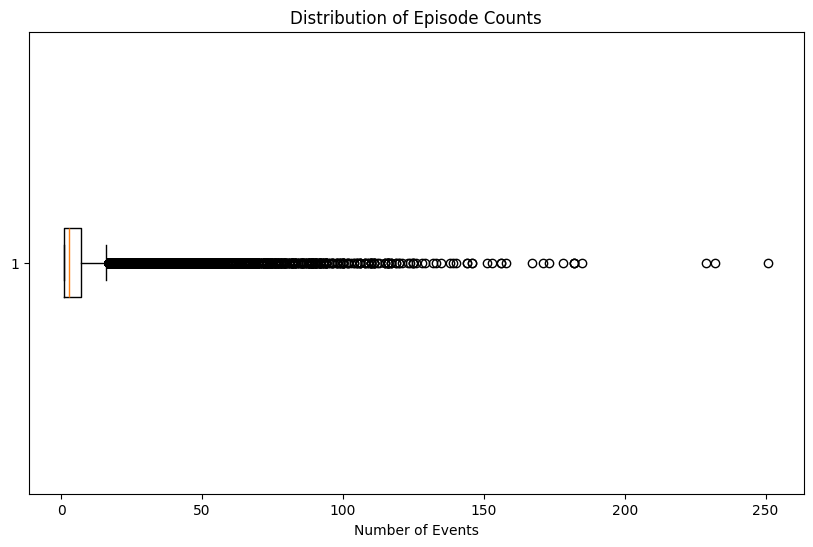

In [7]:
# Create a box plot of the episode counts
plt.figure(figsize=(10, 6))
plt.boxplot(episode_count, vert=False)
plt.title('Distribution of Episode Counts')
plt.xlabel('Number of Events')
plt.show()

In [10]:
df_details['EVENT_TYPE'].unique()

array(['Tornado', 'Thunderstorm Wind', 'Flash Flood', 'Excessive Heat',
       'Winter Storm', 'Extreme Cold/Wind Chill', 'High Wind',
       'Heavy Snow', 'Lightning', 'Hail', 'Flood', 'Heavy Rain',
       'Marine Thunderstorm Wind', 'Debris Flow', 'Rip Current',
       'Dense Fog', 'Blizzard', 'Drought', 'Coastal Flood', 'Strong Wind',
       'Winter Weather', 'High Surf', 'Tropical Storm',
       'Marine High Wind', 'Wildfire', 'Sleet', 'Tropical Depression',
       'Ice Storm', 'Heat', 'Funnel Cloud', 'Cold/Wind Chill',
       'Lakeshore Flood', 'Waterspout', 'Marine Hail', 'Frost/Freeze',
       'Dust Storm', 'Lake-Effect Snow', 'Marine Strong Wind',
       'Marine Tropical Storm', 'Avalanche', 'Hurricane',
       'Astronomical Low Tide', 'Freezing Fog', 'Marine Dense Fog',
       'Sneakerwave', 'Storm Surge/Tide', 'Marine Tropical Depression',
       'Marine Hurricane/Typhoon', 'Dust Devil', 'Seiche',
       'Hurricane (Typhoon)', 'Dense Smoke', 'Marine Lightning',
       'Tsunam

### Outline for Python Notebook: Storm Event Data Analysis

#### 1. **Ask**
   - **Define the Problem**
     - Identify the key questions: 
       - What types of storms are most common in the US?
       - Where do most storms originate?
       - How do storms impact communities (injuries, deaths, damage)?
   - **Confirm Stakeholder Expectations**
     - Define what stakeholders expect from the analysis (e.g., actionable insights, visualizations).

#### 2. **Prepare**
   - **Collect Data**
     - Load the storm event dataset using `pandas`.
     - Explore the dataset structure using `info()`, `head()`, and `describe()`.
   - **Store Data**
     - Save any preliminary data transformations or filtered datasets for later use.

#### 3. **Process**
   - **Clean the Data**
     - Handle missing values and outliers.
     - Convert data types as necessary (e.g., date parsing).
   - **Transform Data**
     - Standardize column names to snake_case.
     - Filter data for specific storm events or time periods if needed.
     - Create new columns for analysis (e.g., total damage).

#### 4. **Analyze**
   - **Descriptive Analysis**
     - Count unique storm events by type.
     - Calculate total injuries, deaths, and property damage.
   - **Geospatial Analysis**
     - Use latitude and longitude data to plot storm origins on a map.
     - Identify regions most affected by specific storm types.
   - **Trends and Patterns**
     - Analyze trends over time (e.g., increase in storm frequency).

#### 5. **Share**
   - **Visualizations**
     - Create graphs and maps to illustrate key findings.
     - Use interactive maps for better engagement.
   - **Interpret Results**
     - Summarize insights from the data (e.g., most common storms, geographic hotspots).

#### 6. **Act**
   - **Recommendations**
     - Provide actionable insights based on findings.
     - Suggest further areas for research or monitoring based on trends.

### Notes
- Ensure to document each step with comments and markdown cells to explain your thought process and findings.
- Include visualizations at appropriate points to enhance understanding.
